# Extracción de Datos de Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
temp_suncho = np.array([])
temp_compost = np.array([])
estados = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = "./measurements/temp/2021-06-14_18-12-22"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,Temp_Compost,Temp_Suncho,Estado
0,14/06/2021_18:12:22,19.94,32.75,Prendido
1,14/06/2021_18:12:23,19.94,32.88,Prendido
2,14/06/2021_18:12:25,19.94,32.88,Prendido
3,14/06/2021_18:12:27,19.94,33.00,Prendido
4,14/06/2021_18:12:28,19.94,33.06,Prendido
...,...,...,...,...
95,14/06/2021_18:14:54,20.12,46.13,Prendido
96,14/06/2021_18:14:56,20.12,46.13,Prendido
97,14/06/2021_18:14:58,20.12,46.06,Prendido
98,14/06/2021_18:14:59,20.12,46.06,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

14/06/2021_18:12:22


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

211


In [7]:
# Llenemos las listas con los datos
for i in range(n):
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost = np.concatenate((temp_compost, np.transpose(df["Temp_Compost"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))

    # Estado
    for e in np.transpose(df["Estado"].to_numpy()):
        if e == "Prendido":
            estados = np.concatenate((estados, np.array([1])))
        else:
            estados = np.concatenate((estados, np.array([0])))

# Gráficos

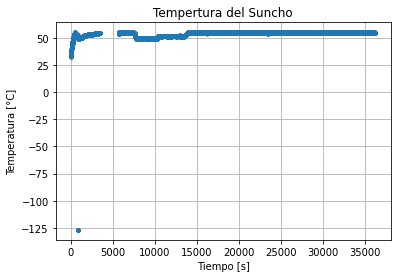

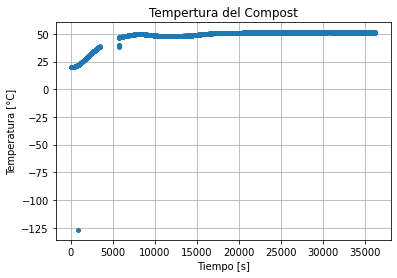

In [8]:
plt.figure("Temperatura del Suncho")
plt.title("Tempertura del Suncho")
plt.plot(tiempos, temp_suncho, ".")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura-del-Suncho.png")
plt.show()

plt.figure("Temperatura del Compost")
plt.title("Tempertura del Compost")
plt.plot(tiempos, temp_compost, ".")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura-del-Compost.png")
plt.show()

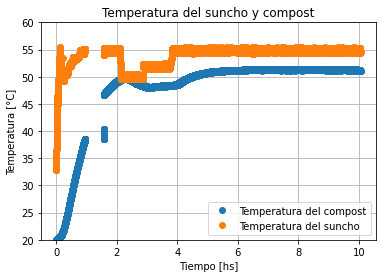

In [9]:
plt.figure("Temperatura del suncho y compost")
plt.title("Temperatura del suncho y compost")
plt.plot(tiempos / (60 * 60), temp_compost, "o", label='Temperatura del compost')
plt.plot(tiempos / (60 * 60), temp_suncho, "o", label='Temperatura del suncho')
plt.legend()
plt.grid()
plt.xlabel("Tiempo [hs]")
plt.ylabel("Temperatura [°C]")
plt.ylim([20,60])
plt.savefig(f"{PATH}/figuras/Temperatura-juntos.png")
plt.show()

# Extracción de Datos de CO2

In [10]:
# Importamos las bibliotecas que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [11]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
mediciones = np.array([])    # (ppm)

In [12]:
# Definamos la carpeta con las mediciones como PATH
PATH = "./measurements/CO2/2021-09-22_12-22-38"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [13]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,CO2
0,22/09/2021_12:22:40,0
1,22/09/2021_12:22:42,0
2,22/09/2021_12:22:44,0
3,22/09/2021_12:22:46,0
4,22/09/2021_12:22:48,0
...,...,...
95,22/09/2021_12:25:52,566
96,22/09/2021_12:25:54,566
97,22/09/2021_12:25:56,566
98,22/09/2021_12:25:58,565


In [14]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

22/09/2021_12:22:40


In [15]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

6


In [16]:
# Llenemos las listas con los datos
for i in range(n):
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # CO2
    mediciones = np.concatenate((mediciones, np.transpose(df["CO2"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))

## Gráficos

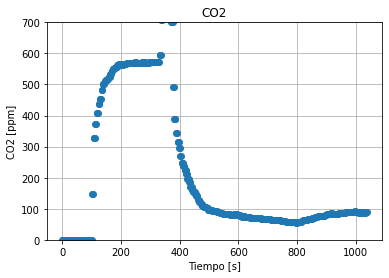

In [17]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, mediciones, "o")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
#plt.xlim([300,2000])
plt.ylim([0,700])
plt.savefig(f"{PATH}/figuras/CO2.png")
plt.show()